In [4]:
%reset -f
%load_ext autoreload
%autoreload 2
from mechanics import *

system_polar = (
    LagrangeSystem()
    .add_coordinate('r')
    .add_coordinate(r'\theta', space=S)
    .add_constant(r'\mu m')
    .define('x y', 'r * cos(theta), r * sin(theta)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', '- m * mu / r')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
    .show(label_str='Kepler Problem in Polar Coordinates')
    .show_all()
)

system_cartesian = (
    LagrangeSystem()
    .add_coordinate('x y')
    .add_constant(r'\mu m')
    .define('r', 'sqrt(x**2 + y**2)')
    .define(r'\theta', 'atan2(y, x)')
    .define('T', 'm/2 * (dot(x)**2 + dot(y)**2)')
    .define('U', '- m * mu / r')
    .define('L', 'T - U')
    .define('E', 'T + U')
    .euler_lagrange_equation('L')
    .show(label_str='Kepler Problem in Cartesian Coordinates')
    .show_all()
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
from mechanics.integrator import *
system_polar_d, system_cartesian_d = (
    system.discretization()
    .uniform_space('t', 'i', 0, 'N', 'h')
    .apply(RK4(('h')))
    .doit()
    for system in (system_polar, system_cartesian)
)

Indices: (i,)
Input: (r(0,), \theta(0,), \dot{r}(0,), \dot{\theta}(0,))


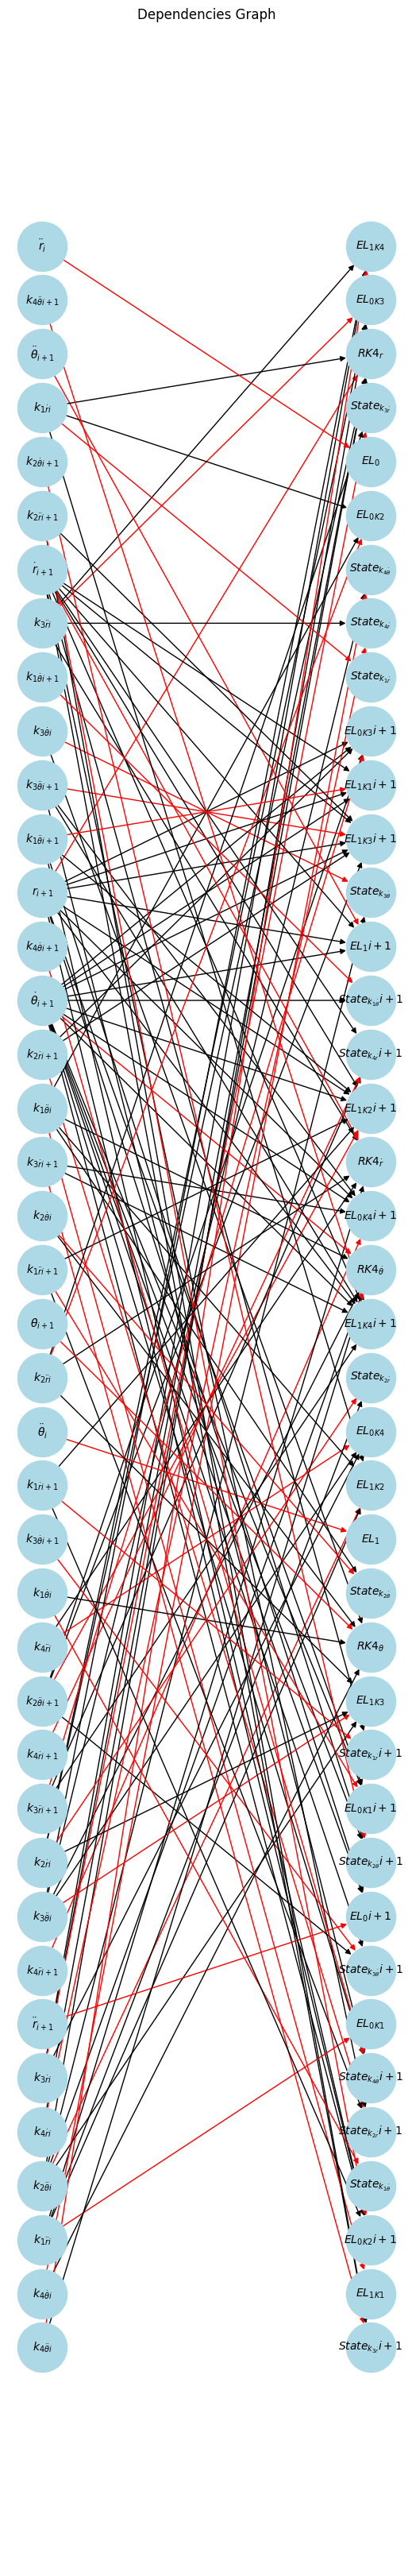

Stage(inputs=[\theta(i,), r(i,), \dot{\theta}(i,), \dot{r}(i,)])):
  Block #0 [i] <- ()
    equations = ('State_{{k_{1\\dot{r}}}}',)
    variables = [{k_{1\dot{r}}}(i,)]
    knowns    = [\theta(i,), r(i,), \dot{\theta}(i,), \dot{r}(i,)]

  Block #1 [i] <- ()
    equations = ('{EL_1}_{K1}',)
    variables = [{k_{1\ddot{\theta}}}(i,)]
    knowns    = [\theta(i,), r(i,), \dot{\theta}(i,), \dot{r}(i,)]

  Block #2 [i] <- ()
    equations = ('{EL_0}_{K1}',)
    variables = [{k_{1\ddot{r}}}(i,)]
    knowns    = [\theta(i,), r(i,), \dot{\theta}(i,), \dot{r}(i,)]

  Block #3 [i] <- ('#0', '#1', '#2')
    equations = ('{EL_1}_{K2}',)
    variables = [{k_{2\ddot{\theta}}}(i,)]
    knowns    = [\theta(i,), {k_{1\dot{r}}}(i,), \dot{\theta}(i,), \dot{r}(i,), r(i,), {k_{1\ddot{\theta}}}(i,), {k_{1\ddot{r}}}(i,)]

  Block #4 [i] <- ('#3',)
    equations = ('State_{{k_{3\\dot{\\theta}}}}',)
    variables = [{k_{3\dot{\theta}}}(i,)]
    knowns    = [\theta(i,), \dot{\theta}(i,), \dot{r}(i,), {k_{2\ddot

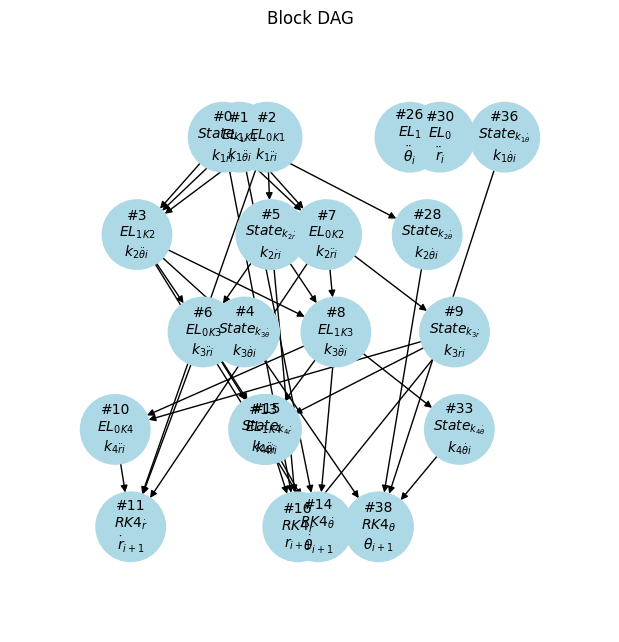

/var/folders/4n/_jcnzrss7571s_0zzmtzqtsr0000gn/T/tmpg9_ezgo7/generated.f90
Indices: (i,)
Input: (x(0,), y(0,), \dot{x}(0,), \dot{y}(0,))


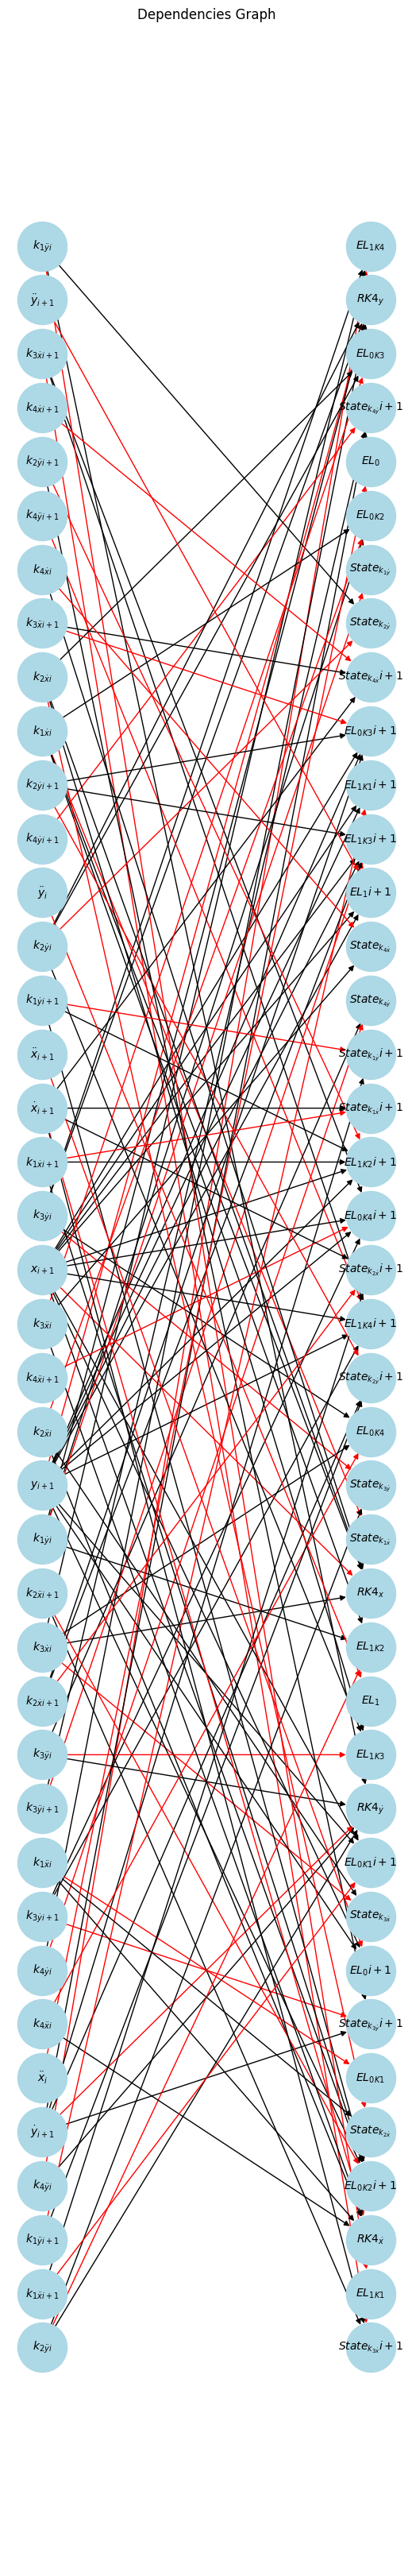

Stage(inputs=[y(i,), \dot{x}(i,), \dot{y}(i,), x(i,)])):
  Block #0 [i] <- ()
    equations = ('State_{{k_{1\\dot{y}}}}',)
    variables = [{k_{1\dot{y}}}(i,)]
    knowns    = [y(i,), \dot{x}(i,), \dot{y}(i,), x(i,)]

  Block #1 [i] <- ()
    equations = ('State_{{k_{1\\dot{x}}}}',)
    variables = [{k_{1\dot{x}}}(i,)]
    knowns    = [y(i,), \dot{x}(i,), \dot{y}(i,), x(i,)]

  Block #2 [i] <- ('#0', '#1')
    equations = ('{EL_1}_{K2}',)
    variables = [{k_{2\ddot{y}}}(i,)]
    knowns    = [\dot{x}(i,), \dot{y}(i,), {k_{1\dot{y}}}(i,), y(i,), {k_{1\dot{x}}}(i,), x(i,)]

  Block #3 [i] <- ('#2',)
    equations = ('State_{{k_{3\\dot{y}}}}',)
    variables = [{k_{3\dot{y}}}(i,)]
    knowns    = [\dot{x}(i,), \dot{y}(i,), {k_{2\ddot{y}}}(i,), y(i,), x(i,)]

  Block #4 [i] <- ('#0', '#1')
    equations = ('{EL_0}_{K2}',)
    variables = [{k_{2\ddot{x}}}(i,)]
    knowns    = [\dot{x}(i,), \dot{y}(i,), {k_{1\dot{y}}}(i,), y(i,), {k_{1\dot{x}}}(i,), x(i,)]

  Block #5 [i] <- ('#3', '#4')
   

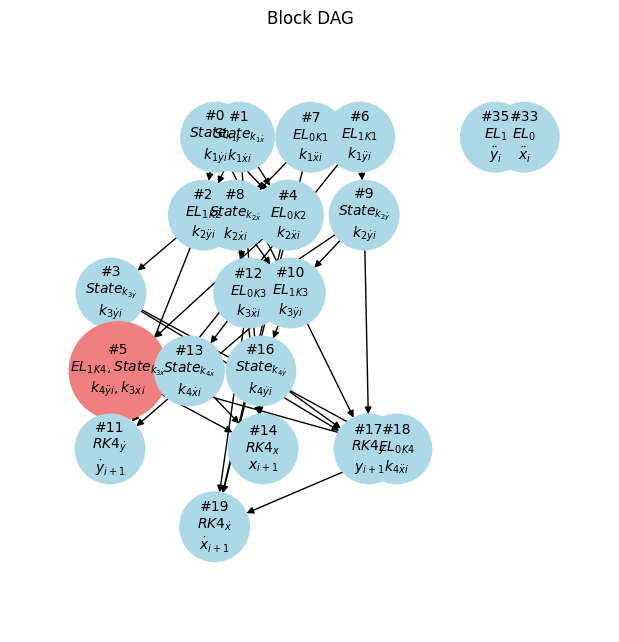

/var/folders/4n/_jcnzrss7571s_0zzmtzqtsr0000gn/T/tmpb89hpa4n/generated.f90


In [6]:
solver_polar, solver_cartesian = (system_d.solver() for system_d in (system_polar_d, system_cartesian_d))

In [33]:
import numpy as np
results = Results()
constants = {
    'm': 1,
    'mu': 1,
    'N': 1000,
    'h': 0.1,
}
results.append(solver_polar.run(
    constants | {
    'r[0]': 1,
    'theta[0]': 0,
    'dotr[0]': 0,
    'dottheta[0]': 1.1,
}))
results.append(solver_cartesian.run(
    constants | {
    'x[0]': 1,
    'y[0]': 0,
    'dotx[0]': 0,
    'doty[0]': 1.1,
}))

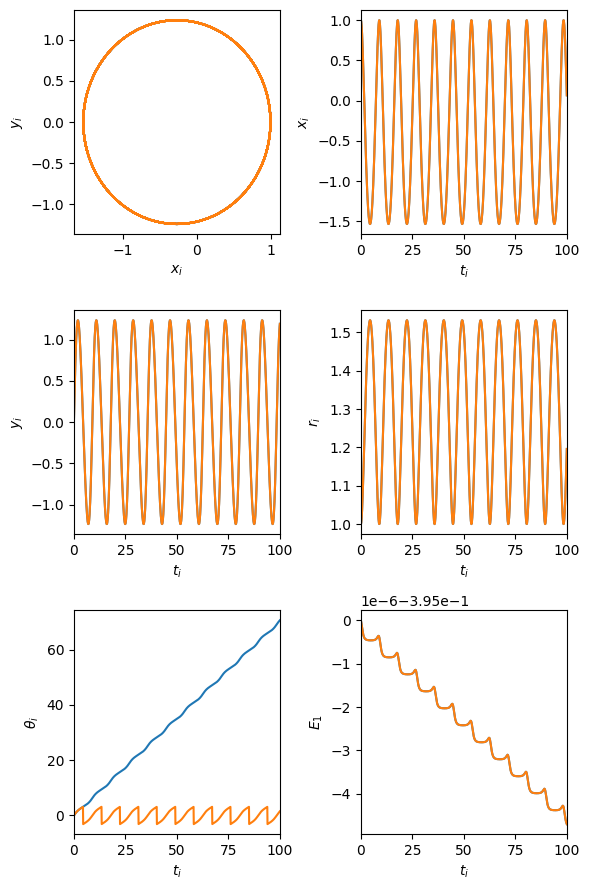

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(6, 9), layout='tight', subplot_kw={'projection': results})
axes = axes.flatten()

axes[0].plot('x', 'y')
axes[1].plot('x')
axes[2].plot('y')
axes[3].plot('r')
axes[4].plot('theta')
axes[5].plot('E[1]')